In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ejercicio 1: Procesos de Markov

In [2]:
M = np.array([[0,0,0,0,0.1],[0.1,0,0.1,0.1,0],[0.6,0,0.2,0.7,0],[0.3,0.3,0.7,0,0.3],[0,0.7,0,0.2,0.6]])
print(M)

[[0.  0.  0.  0.  0.1]
 [0.1 0.  0.1 0.1 0. ]
 [0.6 0.  0.2 0.7 0. ]
 [0.3 0.3 0.7 0.  0.3]
 [0.  0.7 0.  0.2 0.6]]


Calculamos los autovalores de $M$ para saber si existe un estado límite

In [3]:
eig = np.linalg.eig(M)[0]
print(eig)

[ 1.         -0.63989587  0.37337934 -0.03348347  0.1       ]


Calculamos el estado límite de $M$. Empezamos calculando un autovector del $1$ para $M$.

In [4]:
Cbe = np.linalg.eig(M)[1]
print(Cbe)
w = Cbe[:,0]
np.all(np.isclose(w,M@w))

[[-0.05238026 -0.01727787 -0.20476594  0.69410125  0.54433105]
 [-0.12413132  0.0204781   0.16150973  0.34940057 -0.27216553]
 [-0.57578749  0.64332958  0.50677563 -0.32432745 -0.40824829]
 [-0.61314548 -0.7570902   0.30103426 -0.48676522 -0.40824829]
 [-0.52380255  0.11056039 -0.76455369 -0.23240915  0.54433105]]


True

In [5]:
print(w)

[-0.05238026 -0.12413132 -0.57578749 -0.61314548 -0.52380255]


Este $w$, ¿es un estado límite de la matriz $M$?

No: porque sus coordenadas no son positivas ni suman $1$.

In [6]:
w_inf = -w/np.linalg.norm(w,1)
print(w_inf)
print(np.linalg.norm(w_inf,1))

[0.02772547 0.06570412 0.30477087 0.32454488 0.27725466]
1.0


Esto sí es un estado límite de $M$.

Ahora hagamos una simulación computacional para ver si efectivamente $w_\inf$ es un estado límite. Esto no es necesario para resolver el ejercicio, pero nos sirve como verificación de que hicimos las cosas bien.

In [7]:
x0 = np.random.rand(5)
x0 = x0/np.linalg.norm(x0,1)

def markov_test(M,x0, n_iter=500):
    x_old = x0
    for i in range(n_iter):
        x_new = M@x_old
        if np.all(np.isclose(x_new,x_old)):
            print("Terminamos con", i, "iteraciones.")
            return x_new
        x_old = x_new
    print("Advertencia: cantidad máxima de iteraciones alcanzada.")
    return x_new

x = markov_test(M,x0)
np.all(np.isclose(x,w_inf))

Terminamos con 25 iteraciones.


True

En este caso, la matriz límite $M_\infty$ existe y va a tener a $w_\inf$ en todas sus columnas. De nuevo, no es necesario hacer esto, pero verifiquémoslo computacionalmente.

In [8]:
def markov_limit(M,n_iter=500):
    M_old = M.copy()

    for i in range(n_iter):
        M_next = M@M_old
        if np.all(np.isclose(M_next,M_old)):
            print("Terminamos con", i, "iteraciones.")
            return M_next
        M_old = M_next
    print("Advertencia: cantidad máxima de iteraciones alcanzada.")
    return M_next

M_inf = markov_limit(M)
print(M_inf)
print(w_inf)

Terminamos con 28 iteraciones.
[[0.02772547 0.02772546 0.02772545 0.02772549 0.02772546]
 [0.06570411 0.06570413 0.06570414 0.0657041  0.06570413]
 [0.30477063 0.304771   0.30477148 0.30477013 0.30477107]
 [0.32454516 0.32454473 0.32454417 0.32454576 0.32454465]
 [0.27725461 0.27725468 0.27725476 0.27725453 0.27725469]]
[0.02772547 0.06570412 0.30477087 0.32454488 0.27725466]


Ejercicio 2a: determinar para qué valores de $\alpha$ ese método iterativo converge.

In [9]:
A = np.array([[10,-1,0],[-1,20,0],[0,0,3]])
print(A)

[[10 -1  0]
 [-1 20  0]
 [ 0  0  3]]


Este ejercicio se resuelve mayormente a mano. Acá dejo el número $x_0$ que verifica ($\alpha\in(0,x_0)$ si y sólo si el método iterativo propuesto converge).  

In [10]:
x0 = 20*np.sqrt(2)/(10*np.sqrt(2)+1)
print(x0)

1.8679182349373773


Ejercicio 2b: encontrar matriz singular más cercana en norma-2 a $A$

In [11]:
B = A@A
print(B)

[[101 -30   0]
 [-30 401   0]
 [  0   0   9]]


In [12]:
eig = np.linalg.eig(B)
print("Los autovalores son:\n", eig[0])
print("La matriz de cambio de base es:\n", eig[1])

Los autovalores son:
 [ 98.02941459 403.97058541   9.        ]
La matriz de cambio de base es:
 [[-0.99513333  0.09853762  0.        ]
 [-0.09853762 -0.99513333  0.        ]
 [ 0.          0.          1.        ]]


Tenemos que reordenar los VS para que estén de mayor a menor, y hacer el mismo reordenamiento con las columnas de $V$.

In [13]:
valores_singulares = np.sqrt(eig[0])[[1,0,2]]
S = np.diag(valores_singulares)
V = ((eig[1]).T[[1,0,2]]).T
print(S)
print(V)

[[20.09901951  0.          0.        ]
 [ 0.          9.90098049  0.        ]
 [ 0.          0.          3.        ]]
[[ 0.09853762 -0.99513333  0.        ]
 [-0.99513333 -0.09853762  0.        ]
 [ 0.          0.          1.        ]]


Ahora calculemos $U$.

In [14]:
U = np.zeros((3,3))
for i in range(3):
    U[:,i] = (A@V[:,i])/S[i,i]
print(U)
print(U@U.T)
print(U@S@V.T)

[[ 0.09853762 -0.99513333  0.        ]
 [-0.99513333 -0.09853762  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.00000000e+00 -4.24218662e-17  0.00000000e+00]
 [-4.24218662e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[10. -1.  0.]
 [-1. 20.  0.]
 [ 0.  0.  3.]]


Efectivamente vale que $U$ es ortogonal y $USV^t$ es descomposición SVD de $A$. Sólo nos queda calcular la matriz singular más cercana a $A$, que la obtenemos truncando $S$. 

In [15]:
S_2 = S.copy()
S_2[2,2]=0
print(S_2)

[[20.09901951  0.          0.        ]
 [ 0.          9.90098049  0.        ]
 [ 0.          0.          0.        ]]


In [16]:
A_aprox = U@S_2@V.T
print(A_aprox)
print(np.linalg.norm(A-A_aprox,2))

[[10. -1.  0.]
 [-1. 20.  0.]
 [ 0.  0.  0.]]
3.0


Ejercicio 3

In [24]:
# Cargo los datos desde el archivo
data_frame = pd.read_csv('carbono14.csv')
display(data_frame)

# Lo convierto a una matriz de numpy
xy = data_frame.to_numpy(dtype='float')
#display(xy)

,Año,C14
0,0,11510
1,750,10485
2,1530,9686
3,2370,8722
4,3230,7620
5,3860,7424
6,4570,6441
7,5580,5933
8,6340,5535
9,7050,5211


Ejercicio 3a: ajustamos con una recta.

[ 1.01330937e+04 -6.33394562e-01]


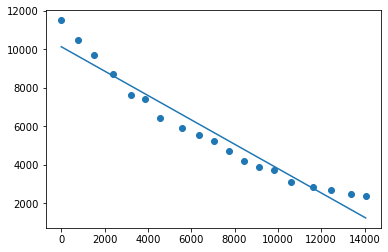

In [40]:
x = xy[:,0]
y = xy[:,1]

ones = np.ones((len(xy),1))
px = x
A = np.c_[ones,px]
c = np.linalg.solve(A.T@A,A.T@y)
print(c)

plt.scatter(x,y)

#xs = np.linspace(0,14050,10)#esta mal, hay q poner valores pasando el ultimo para q se evalue uno para cada punto en y
xs = np.linspace(0,14050,15000)
ys = c[0]+c[1]*xs
plt.plot(xs,ys)

In [41]:
print(xs)
print(ys)

[    0.          1561.11111111  3122.22222222  4683.33333333
  6244.44444444  7805.55555556  9366.66666667 10927.77777778
 12488.88888889 14050.        ]
[10133.09365538  9144.29436707  8155.49507877  7166.69579046
  6177.89650216  5189.09721386  4200.29792555  3211.49863725
  2222.69934894  1233.90006064]


Ejercicio 3b: repetimos con una función de la forma $a+bx^2$

[ 8.32350663e+03 -3.91480264e-05]


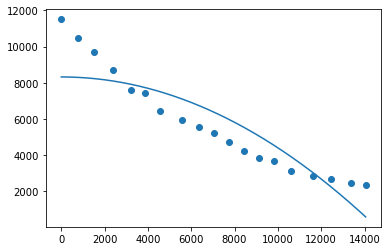

In [21]:
px = x**2
B = np.c_[ones,px]
c = np.linalg.solve(B.T@B,B.T@y)
print(c)

plt.scatter(x,y)

xs = np.linspace(0,14050,15000)
ys = c[0]+c[1]*(xs*xs)
plt.plot(xs,ys)

Ejercicio 3bbonus: repetimos con una función de la forma $a+bx+cx^2$

[ 1.13199787e+04 -1.16619836e+00  3.79651625e-05]


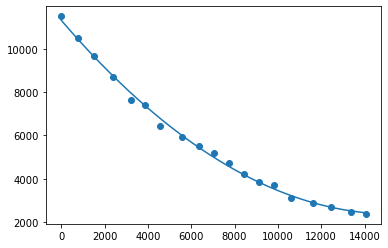

In [22]:
px = x**2
BB = np.c_[ones,x,px]
c = np.linalg.solve(BB.T@BB,BB.T@y)
print(c)

plt.scatter(x,y)

xs = np.linspace(0,14050,15000)
ys = c[0]+c[1]*xs+c[2]*(xs**2)
plt.plot(xs,ys)

Ejercicio 3c: repetimos con una función de la forma $ae^{bx}$

[ 9.33900632e+00 -1.15622728e-04]


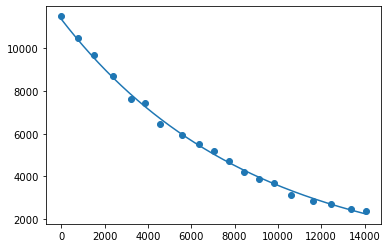

In [23]:
px = x
log_y = np.log(y)
C = np.c_[ones,px]
c = np.linalg.solve(C.T@C,C.T@log_y)
print(c)

c[0]=np.e**(c[0])

plt.scatter(x,y)

xs = np.linspace(0,14050,15000)
ys = c[0]*np.e**(c[1]*xs)
plt.plot(xs,ys)